## Setup Target Board

In [1]:
PLATFORM = 'CWLITEARM'
CRYPTO_TARGET = 'NONE'
SS_VER = 'SS_VER_1_1'

## Detect Chipwhisperer Board

In [2]:
import time
import chipwhisperer as cw

scope = cw.scope()

target_type = cw.targets.SimpleSerial
try:
    target = cw.target(scope, target_type)
except:
    print("INFO: Caught exception on reconnecting to target - attempting to reconnect to scope first.")
    print("INFO: This is a work-around when USB has died without Python knowing. Ignore errors above this line.")
    scope = cw.scope()
    target = cw.target(scope, target_type)

print("INFO: Found ChipWhisperer😍")

prog = cw.programmers.STM32FProgrammer

time.sleep(0.05)
scope.default_setup()
def reset_target(scope):
    scope.io.nrst = 'low'
    time.sleep(0.05)
    scope.io.nrst = 'high_z'
    time.sleep(0.05)
    
print(scope.clock)


(ChipWhisperer Other WARNING|File __init__.py:69) ChipWhisperer update available! See https://chipwhisperer.readthedocs.io/en/latest/installing.html for updating instructions


INFO: Found ChipWhisperer😍
adc_src       = clkgen_x4
adc_phase     = 0
adc_freq      = 96000000
adc_rate      = 96000000.0
adc_locked    = True
freq_ctr      = 0
freq_ctr_src  = extclk
clkgen_src    = system
extclk_freq   = 10000000
clkgen_mul    = 2
clkgen_div    = 26
clkgen_freq   = 7384615.384615385
clkgen_locked = True



## Compile
There are some warnings (for now). 

In [3]:
%%bash -s "$SS_VER" "$PLATFORM" "$CRYPTO_TARGET"
rm -rf objdir-$2 objdir .dep
make SS_VER=$1 PLATFORM=$2 CRYPTO_TARGET=$3

Building for platform CWLITEARM with CRYPTO_TARGET=NONE
SS_VER set to SS_VER_1_1
make clean_objs .dep 
make[1]: Entering directory '/home/vagrant/work/projects/chipwhisperer/hardware/victims/firmware/ed25519'
Building for platform CWLITEARM with CRYPTO_TARGET=NONE
SS_VER set to SS_VER_1_1
rm -f -- simpleserial_ed25519-CWLITEARM.hex
rm -f -- simpleserial_ed25519-CWLITEARM.eep
rm -f -- simpleserial_ed25519-CWLITEARM.cof
rm -f -- simpleserial_ed25519-CWLITEARM.elf
rm -f -- simpleserial_ed25519-CWLITEARM.map
rm -f -- simpleserial_ed25519-CWLITEARM.sym
rm -f -- simpleserial_ed25519-CWLITEARM.lss
rm -f -- objdir-CWLITEARM/*.o
rm -f -- objdir-CWLITEARM/*.lst
rm -f -- main.s test.s crypto/numerics/bigint.s crypto/numerics/fe25519.s crypto/numerics/fe25519_invert.s crypto/numerics/sc25519.s crypto/scalarmult/cSwapAndRandomize.s crypto/scalarmult/scalarmult_25519.s crypto/support/randombytes.s crypto/hash/fips202-masked.s crypto/ed25519/ed25519.s simpleserial.s stm32f3_hal.s stm32f3_hal_lowlevel

main.c: In function 'scalarmult_unprotected_var_sc_test':
main.c:99:12: warning: variable 'res' set but not used [-Wunused-but-set-variable]
   uint32_t res;
            ^~~
main.c: In function 'scalarmult_var_sc_test':
main.c:120:12: warning: variable 'res' set but not used [-Wunused-but-set-variable]
   uint32_t res;
            ^~~
main.c: In function 'scalarmult_ephemeral_var_sc_test':
main.c:141:12: warning: variable 'res' set but not used [-Wunused-but-set-variable]
   uint32_t res;
            ^~~
main.c: In function 'ed25519_sign_unprotected_var_msg_test':
main.c:237:12: warning: variable 'res' set but not used [-Wunused-but-set-variable]
   uint32_t res;
            ^~~
main.c: In function 'ed25519_sign_var_msg_test':
main.c:275:12: warning: variable 'res' set but not used [-Wunused-but-set-variable]
   uint32_t res;
            ^~~
main.c: In function 'ed25519_sign_ephemeral_var_msg_test':
main.c:313:12: warning: variable 'res' set but not used [-Wunused-but-set-variable]
   

.
Compiling C: test.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CWLITEARM/test.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/test.o.d test.c -o objdir-CWLITEARM/test.o
.
Compiling C: crypto/numerics/bigint.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM

.
Compiling C: .././simpleserial/simpleserial.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CWLITEARM/simpleserial.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/simpleserial.o.d .././simpleserial/simpleserial.c -o objdir-CWLITEARM/simpleserial.o
.
Compiling C: .././hal/stm32f3/stm32f3_hal.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32

In file included from .././hal/stm32f3/stm32f3xx_hal_def.h:49,
                 from .././hal/stm32f3/stm32f3xx_hal_rcc.h:47,
                 from .././hal/stm32f3/stm32f3_hal.c:4:
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:452: warning: "GPIO_SPEED_HIGH" redefined
  #define  GPIO_SPEED_HIGH   GPIO_SPEED_FREQ_HIGH
 
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:439: note: this is the location of the previous definition
 #define  GPIO_SPEED_HIGH                          GPIO_SPEED_FREQ_VERY_HIGH
 


.
Compiling C: .././hal/stm32f3/stm32f3_hal_lowlevel.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CWLITEARM/stm32f3_hal_lowlevel.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/stm32f3_hal_lowlevel.o.d .././hal/stm32f3/stm32f3_hal_lowlevel.c -o objdir-CWLITEARM/stm32f3_hal_lowlevel.o


In file included from .././hal/stm32f3/stm32f3xx_hal_def.h:49,
                 from .././hal/stm32f3/stm32f3xx_hal_rcc.h:47,
                 from .././hal/stm32f3/stm32f3_hal_lowlevel.c:40:
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:452: warning: "GPIO_SPEED_HIGH" redefined
  #define  GPIO_SPEED_HIGH   GPIO_SPEED_FREQ_HIGH
 
.././hal/stm32f3/Legacy/stm32_hal_legacy.h:439: note: this is the location of the previous definition
 #define  GPIO_SPEED_HIGH                          GPIO_SPEED_FREQ_VERY_HIGH
 


.
Compiling C: .././hal/stm32f3/stm32f3_sysmem.c
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I.  -mthumb -mfloat-abi=soft -fmessage-length=0 -ffunction-sections -gdwarf-2 -DSTM32F4 -DCORTEX_M4 -mthumb -mcpu=cortex-m4 -mfpu=fpv4-sp-d16 -DSS_VER=SS_VER_1_1 -DSTM32F303xC -DSTM32F3 -DSTM32 -DDEBUG -DHAL_TYPE=HAL_stm32f3 -DPLATFORM=CWLITEARM -DF_CPU=7372800UL -DSS_VER_2_0=2 -DSS_VER_2_1=3 -DSS_VER_1_1=1 -DSS_VER_1_0=0 -O2 -funsigned-char -funsigned-bitfields -fshort-enums -Wall -Wstrict-prototypes -Wa,-adhlns=objdir-CWLITEARM/stm32f3_sysmem.lst -I.././simpleserial/ -I.././hal -I.././hal/stm32f3 -I.././hal/stm32f3/CMSIS -I.././hal/stm32f3/CMSIS/core -I.././hal/stm32f3/CMSIS/device -I.././hal/stm32f4/Legacy -I.././crypto/ -std=gnu99  -MMD -MP -MF .dep/stm32f3_sysmem.o.d .././hal/stm32f3/stm32f3_sysmem.c -o objdir-CWLITEARM/stm32f3_sysmem.o
.
Assembling: crypto/asm/cortex_m4_add_fe25519.S
arm-none-eabi-gcc -c -mcpu=cortex-m4 -I. -x assembler-with-cpp -mthumb -mfloat-abi=soft -fmessage-length=0 -ffun

.
Creating load file for Flash: simpleserial_ed25519-CWLITEARM.hex
arm-none-eabi-objcopy -O ihex -R .eeprom -R .fuse -R .lock -R .signature simpleserial_ed25519-CWLITEARM.elf simpleserial_ed25519-CWLITEARM.hex
.
Creating load file for Flash: simpleserial_ed25519-CWLITEARM.bin
arm-none-eabi-objcopy -O binary -R .eeprom -R .fuse -R .lock -R .signature simpleserial_ed25519-CWLITEARM.elf simpleserial_ed25519-CWLITEARM.bin
.
Creating load file for EEPROM: simpleserial_ed25519-CWLITEARM.eep
arm-none-eabi-objcopy -j .eeprom --set-section-flags=.eeprom="alloc,load" \
--change-section-lma .eeprom=0 --no-change-warnings -O ihex simpleserial_ed25519-CWLITEARM.elf simpleserial_ed25519-CWLITEARM.eep || exit 0
.
Creating Extended Listing: simpleserial_ed25519-CWLITEARM.lss
arm-none-eabi-objdump -h -S -z simpleserial_ed25519-CWLITEARM.elf > simpleserial_ed25519-CWLITEARM.lss
.
Creating Symbol Table: simpleserial_ed25519-CWLITEARM.sym
arm-none-eabi-nm -n simpleserial_ed25519-CWLITEARM.elf > simpleseri

## Flash Binary on the Victim Board

**Note:** If you use a STM32F target board of Revision-02 then you first need to set a specific jumper cable on the UFO board for the following code to work.

For more information have a look here: https://rtfm.newae.com/Targets/UFO%20Targets/CW308T-STM32F/

In [4]:
HEXFILE = "./simpleserial_ed25519-" + PLATFORM + ".hex"
cw.program_target(scope, prog, HEXFILE)

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 31263 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 31263 bytes


# Testing software

## Some Imports and Definitions

In [5]:
# Python module with customized ed25519 verify from cw_ed25519.py, needs Pycryptodome
from cw_ed25519 import ed25519_verify
from cw_ed25519 import ed25519_keypair_generation
from cw_ed25519 import ed25519_test_scamult_base
import os
import time
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

plt.ioff()

testing_pub_key = bytes.fromhex('0cdb1ed86417077eaeb730379ca3286c5709aafec40686c731a12d63499ee0b5')
testing_priv_pub_key = bytes.fromhex('9d61b19deffd5a60ba844af492ec2cc44449c5697b326919703bac031cae7f600cdb1ed86417077eaeb730379ca3286c5709aafec40686c731a12d63499ee0b5')
testing_msg = bytes.fromhex('ab11ccddeeffeeffeedd')

## Basic Echo Test for Connection

In [6]:
# Send test signal
CMD_TEST = 'e'

DATA_LEN=16
RESP_LEN=16

target.flush()
msg = bytearray([x for x in range(DATA_LEN)])
scope.arm()
target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)
print("res: {}".format(response))

res: bytearray(b'\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x0c\r\x0e\x0f')


## Playground

In [7]:
%matplotlib notebook

#CMD_TEST = 'c'
#CMD_TEST = 'f' # ed25519_sign_unprotected_var_msg_test
#CMD_TEST = 'g' # ed25519_sign_var_msg_test
#CMD_TEST = 'h' # ed25519_sign_unprotected_var_key_test
#CMD_TEST = 'p' # ed25519_sign_ephemeral_var_key_test
CMD_TEST = 'j' # scalarmult_var_sc_test
#CMD_TEST = 'l'
CMD_TEST = 'k'

RESP_LEN=32
DATA_LEN=64

scope.adc.samples = 24400
scope.adc.decimate = 85
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

scope.adc.offset = 0

target.flush()
scope.arm()

#msg = bytearray([ x for x in range(DATA_LEN)])
#msg = bytearray(os.urandom(32))
#msg = os.urandom(64)
#print(msg.hex())
#print('Random msg: ', msg.hex())
msg = ed25519_keypair_generation(os.urandom(32))
#print(privpub_key.hex())

payload = msg
target.simpleserial_write(CMD_TEST,bytearray(payload))
#target.simpleserial_write(CMD_TEST,bytearray(msg))
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)

print("res: {}".format(response.hex()))
last_trace = scope.get_last_trace()
print(scope.adc.trig_count)
#if (0 == ed25519_verify(response, testing_pub_key, msg)):
if (0 == ed25519_test_scamult_base(msg, response)):
    print('Signature verified: OK')
else:
    print('Signature verified: FAIL')
plt.plot(last_trace)
plt.show()

(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0b
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 08
(ChipWhisperer Scope ERROR|File OpenADC.py:677) Received fewer points than expected: 9816 vs 24400
(ChipWhisperer Target WARNING|File SimpleSerial.py:396) Unexpected start to command: 


AttributeError: 'NoneType' object has no attribute 'hex'

## Sign Once

Random msg:  8cace091f20e4531a6de83d73f8dd92f13bcf62ac2968fd403ca958468b49a92
res: b628c60e82711da7b5397a5606be555f3dfb137b867473d488f04203e500d0d930d8333cfd9e528b063fefa6a55a282f3ebd86c06944725d5fa5641004e8ab07
1836022
Signature verified: OK


<IPython.core.display.Javascript object>


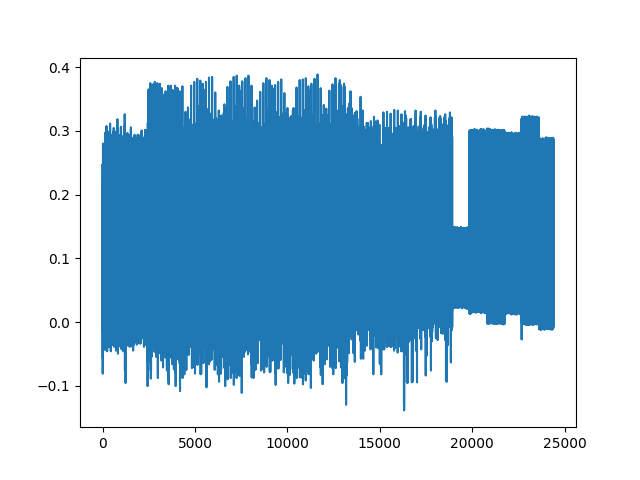

In [8]:
%matplotlib notebook

CMD_TEST = 'o'
RESP_LEN=64
DATA_LEN=32

scope.adc.samples = 24400
scope.adc.decimate = 112
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

target.flush()
scope.arm()

#msg = bytearray([ x for x in range(DATA_LEN)])
msg = bytearray(os.urandom(32))
print('Random msg: ', msg.hex())

target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)

print("res: {}".format(response.hex()))
last_trace = scope.get_last_trace()
print(scope.adc.trig_count)
if (0 == ed25519_verify(response, testing_pub_key, bytes(msg[:]))):
    print('Signature verified: OK')
else:
    print('Signature verified: FAIL')
plt.plot(last_trace)
plt.show()

## TVLA: Sign Unprotected 1000x

In [10]:
# TVLA
%matplotlib notebook

RESP_LEN=64

scope.adc.samples = 24400
scope.adc.decimate = 112
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

# TVLA config
N=1000
group0 = []
group1 = []
group2 = []
print(f'Measuring {N} measurements each group (g0, g1).')
print(f'g0: fixed msg, fixed key')
print(f'g1: random msg, fixed key')
#print(f'g2: fixed msg, random key')
print(f'Protection type: Unprotected')
print(f'-------------------')

start = time.time()
max_trigger_count = 0

# ===== group1 - fixed msg, fixed key =====
CMD_TEST = 'f' # ed25519_sign_unprotected_var_msg_test
DATA_LEN=32

for i in range(N):
    target.flush()
    scope.arm()
    
    msg = bytearray([ x for x in range(DATA_LEN)]) # fixed msg
    payload = msg
    target.simpleserial_write(CMD_TEST,payload)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    if (0 == ed25519_verify(response, testing_pub_key, bytes(msg[:]))):
        group0.append(last_trace)
    else:
        print(i, 'Signature verified: FAIL')
    if (i % 250 == 0):
        print(f'group0, iteration: {i}')

        
# ===== group2 - random msg, fixed key =====
CMD_TEST = 'f' # ed25519_sign_unprotected_var_msg_test
DATA_LEN=32

for i in range(N):
    target.flush()
    scope.arm()
    
    msg = bytearray(os.urandom(DATA_LEN)) # random msg
    payload = msg
    target.simpleserial_write(CMD_TEST,payload)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()

    if (0 == ed25519_verify(response, testing_pub_key, bytes(msg[:]))):
        group1.append(last_trace)
    else:
        print(i, 'Signature verified: FAIL')
    if (i % 250 == 0):
        print(f'group1, iteration: {i}')
        

# # ===== group3 - fixed msg, random key =====
# CMD_TEST = 'h' # ed25519_sign_unprotected_var_key_test
# DATA_LEN=64

# for i in range(N):
#     target.flush()
#     scope.arm()
    
#     privpub_key = ed25519_keypair_generation(os.urandom(32))
#     payload = bytearray(privpub_key)
#     target.simpleserial_write(CMD_TEST,payload)
#     scope.capture()
#     response = target.simpleserial_read('r', RESP_LEN)
    
#     last_trace = scope.get_last_trace()

#     if (0 == ed25519_verify(response, privpub_key[32:], bytes(testing_msg))):
#         group2.append(last_trace)
#     else:
#         print(i, 'Signature verified: FAIL')
#     if (i % 250 == 0):
#         print(f'group2, iteration: {i}')
    
end = time.time()
print(f'Measurement finished.')
print(f'Elapsed time of 2*{N} measurements: {end - start}s')
group0_un = np.array(group0)
print(f'g0 len: {len(group0)}')
group1_un = np.array(group1)
print(f'g1 len: {len(group1)}')
# group2_un = np.array(group2)
# print(f'g2 len: {len(group2)}')

Measuring 1000 measurements each group (g0, g1).
g0: fixed msg, fixed key
g1: random msg, fixed key
Protection type: Unprotected
-------------------
group1, iteration: 0
group1, iteration: 250
group1, iteration: 500
group1, iteration: 750
group2, iteration: 0
group2, iteration: 250
group2, iteration: 500
group2, iteration: 750
Measurement finished.
Elapsed time of 2*1000 measurements: 910.3864221572876s
g0 len: 1000
g1 len: 1000


In [11]:
np.save('tvla_un_g0.npy', group0_un)
np.save('tvla_un_g1.npy', group1_un)
#np.save('tvla_un_g2.npy', group2_un)

In [12]:
group0_un = np.load('tvla_un_g0.npy')
group1_un = np.load('tvla_un_g1.npy')
#group2_un = np.load('tvla_un_g2.npy')

## TVLA: Evaluation Sign Unprotected

In [13]:
# g1 g2
t_val_un01 = ttest_ind(group0_un, group1_un, axis=0, equal_var=False)[0]

# g1 g3
# t_val_un02 = ttest_ind(group0_un, group2_un, axis=0, equal_var=False)[0]

<IPython.core.display.Javascript object>


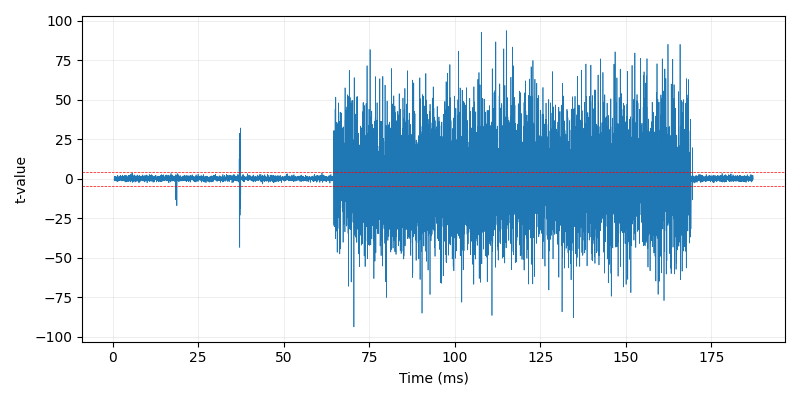

In [20]:
sample_rate = scope.clock.adc_freq / 112 # = scope.clock.adc_rate, 112 here is decimate
time_us = (np.arange(24400) / math.floor(sample_rate)) * 1e3

plt.figure(figsize=(8,4))
plt.plot(time_us[30:12270], t_val_un01[30:12270], linewidth=0.5)
plt.axhline(y=4.5, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=-4.5, color='r', linestyle='--', linewidth=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('t-value')
plt.grid(True, alpha=0.3, linewidth=0.5)
plt.tight_layout()
plt.savefig("tvla_sign_un_01.svg", format="svg", bbox_inches='tight')
#plt.ylim(-10, 10)

## TVLA: Sign Static 1000x

In [21]:
# TVLA
%matplotlib notebook

RESP_LEN=64

scope.adc.samples = 24400
scope.adc.decimate = 112
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

# TVLA config
N=1000
group0 = []
group1 = []
group2 = []
print(f'Measuring {N} measurements each group (g0, g1).')
print(f'g0: fixed msg, fixed key')
print(f'g1: random msg, fixed key')
#print(f'g2: fixed msg, random key')
print(f'Protection type: Static')
print(f'-------------------')

start = time.time()

# ===== group0 - fixed msg, fixed key =====
CMD_TEST = 'g' # ed25519_sign_var_msg_test
DATA_LEN=32

for i in range(N):
    target.flush()
    scope.arm()
    
    msg = bytearray([ x for x in range(DATA_LEN)]) # fixed msg
    target.simpleserial_write(CMD_TEST,msg)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    if (0 == ed25519_verify(response, testing_pub_key, bytes(msg[:]))):
        group0.append(last_trace)
    else:
        print(i, 'Signature verified: FAIL')
    if (i % 250 == 0):
        print(f'group0, iteration: {i}')
        
        
# ===== group1 - random msg, fixed key =====
CMD_TEST = 'g' # ed25519_sign_var_msg_test
DATA_LEN=32

for i in range(N):
    target.flush()
    scope.arm()
    
    msg = bytearray(os.urandom(DATA_LEN)) # random msg
    target.simpleserial_write(CMD_TEST,msg)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    if (0 == ed25519_verify(response, testing_pub_key, bytes(msg[:]))):
        group1.append(last_trace)
    else:
        print(i, 'Signature verified: FAIL')
    if (i % 250 == 0):
        print(f'group1, iteration: {i}')
        

# # ===== group2 - fixed msg, random key =====
# CMD_TEST = 'i' # ed25519_sign_var_key_test
# DATA_LEN=64

# for i in range(N):
#     target.flush()
#     scope.arm()
    
#     privpub_key = ed25519_keypair_generation(os.urandom(32))
#     target.simpleserial_write(CMD_TEST,privpub_key)
#     scope.capture()
#     response = target.simpleserial_read('r', RESP_LEN)
    
#     last_trace = scope.get_last_trace()
    
#     if (0 == ed25519_verify(response, privpub_key[32:], bytes(testing_msg))):
#         group2.append(last_trace)
#     else:
#         print(i, 'Signature verified: FAIL')
#     if (i % 250 == 0):
#         print(f'group2, iteration: {i}')

    
end = time.time()
print(f'Measuring finished.')
print(f'Elapsed time of 2*{N} measurements: {end - start}s')
group0_st = np.array(group0)
print(f'g0 len: {len(group0)}')
group1_st = np.array(group1)
print(f'g1 len: {len(group1)}')
#group2_st = np.array(group2)
#print(f'g2 len: {len(group2)}')

Measuring 1000 measurements each group (g0, g1).
g0: fixed msg, fixed key
g1: random msg, fixed key
Protection type: Static
-------------------
group0, iteration: 0
group0, iteration: 250
group0, iteration: 500
group0, iteration: 750
group1, iteration: 0
group1, iteration: 250
group1, iteration: 500
group1, iteration: 750
Measuring finished.
Elapsed time of 2*1000 measurements: 896.9976422786713s
g0 len: 1000
g1 len: 1000


In [22]:
np.save('tvla_st_g0.npy', group0_st)
np.save('tvla_st_g1.npy', group1_st)
#np.save('tvla_st_g2.npy', group2_st)

In [23]:
group0_st = np.load('tvla_st_g0.npy')
group1_st = np.load('tvla_st_g1.npy')
#group2_st = np.load('tvla_st_g2.npy')

## TVLA: Evaluation Sign Static

In [24]:
# g1 g2
t_val_st01 = ttest_ind(group0_st, group1_st, axis=0, equal_var=False)[0]

# g1 g3
# t_val_st02 = ttest_ind(group0_st, group2_st, axis=0, equal_var=False)[0]

<IPython.core.display.Javascript object>


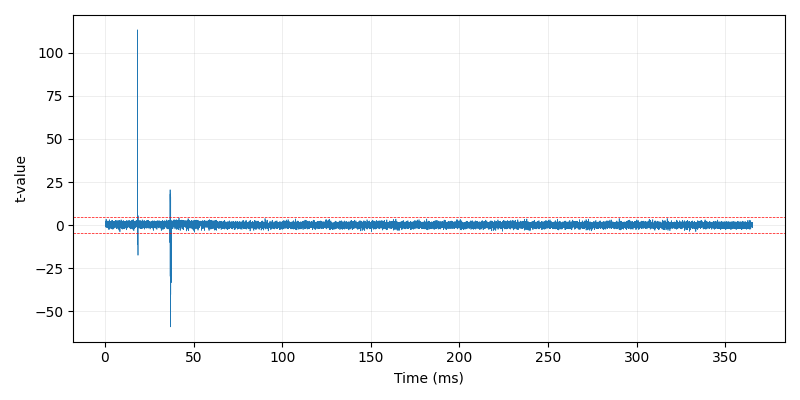

In [30]:
sample_rate = scope.clock.adc_freq / 112 # = scope.clock.adc_rate
time_us = (np.arange(24400) / math.floor(sample_rate)) * 1e3

plt.figure(figsize=(8,4))
plt.plot(time_us[30:24100], t_val_st01[30:24100], linewidth=0.5)
plt.axhline(y=4.5, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=-4.5, color='r', linestyle='--', linewidth=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('t-value')
plt.grid(True, alpha=0.3, linewidth=0.5)
plt.tight_layout()
plt.savefig("tvla_sign_st_01.svg", format="svg", bbox_inches='tight')
#plt.ylim(-10, 10)

In [31]:
for i in range(len(t_val_st01)):
    if (t_val_st01[i] >= 4.5 or t_val_st01[i] <= -4.5):
        print(i, t_val_st01[i])

5 -6.719312700918676
1206 -11.027743569300709
1208 113.33872874588643
1230 -17.474922149023396
1232 5.478196810533301
2422 -10.17048734431284
2424 -5.396178142332076
2425 20.508873746909952
2427 -21.781016029362497
2428 -29.694555194652995
2429 17.95721353141364
2430 8.500710936706023
2431 -15.577262273708246
2432 -20.101605436376612
2433 12.51735775980546
2434 -35.53580635968097
2435 12.08655805615882
2436 -59.05799921651524
2437 -10.07784088421079
2438 -11.534194357564191
2440 11.814506793877054
2442 5.017265795040687
2443 -37.349202013118976
2444 -20.48404761302505
2445 -4.545387642376389
2446 16.375530381784575
2447 -40.32341786318491
2448 9.463600624173436
2450 -10.520111239808353
2453 -8.95367450624591
2461 -7.883875438943957
2463 -7.23949628027616
2464 -13.185544419233764
2465 -33.3435848014625


## TVLA: Sign 1000x Ephemeral

In [9]:
# TVLA
%matplotlib notebook

RESP_LEN=64

scope.adc.samples = 24400
scope.adc.decimate = 112
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

# TVLA config
N=1000
group0 = []
group1 = []
group2 = []
print(f'Measuring {N} measurements each group (g0, g1).')
print(f'g0: fixed msg, fixed key')
print(f'g1: random msg, fixed key')
#print(f'g2: fixed msg, random key')
print(f'Protection type: Ephemeral')
print(f'-------------------')

start = time.time()

# ===== group0 - fixed msg, fixed key =====
CMD_TEST = 'o' # ed25519_sign_var_msg_test
DATA_LEN=32

for i in range(N):
    target.flush()
    scope.arm()
    
    msg = bytearray([ x for x in range(DATA_LEN)]) # fixed msg
    target.simpleserial_write(CMD_TEST,msg)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    if (0 == ed25519_verify(response, testing_pub_key, bytes(msg[:]))):
        group0.append(last_trace)
    else:
        print(i, 'Signature verified: FAIL')
    if (i % 250 == 0):
        print(f'group0, iteration: {i}')
        
        
# ===== group1 - random msg, fixed key =====
CMD_TEST = 'o' # ed25519_sign_var_msg_test
DATA_LEN=32

for i in range(N):
    target.flush()
    scope.arm()
    
    msg = bytearray(os.urandom(DATA_LEN)) # random msg
    target.simpleserial_write(CMD_TEST,msg)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()

    if (0 == ed25519_verify(response, testing_pub_key, bytes(msg[:]))):
        group1.append(last_trace)
    else:
        print(i, 'Signature verified: FAIL')
    if (i % 250 == 0):
        print(f'group1, iteration: {i}')
        

# # ===== group2 - fixed msg, random key =====
# CMD_TEST = 'p' # ed25519_sign_var_key_test
# DATA_LEN=64

# for i in range(N):
#     target.flush()
#     scope.arm()
    
#     privpub_key = ed25519_keypair_generation(os.urandom(32))
#     target.simpleserial_write(CMD_TEST,privpub_key)
#     scope.capture()
#     response = target.simpleserial_read('r', RESP_LEN)
    
#     last_trace = scope.get_last_trace()
    
#     if (0 == ed25519_verify(response, privpub_key[32:], bytes(testing_msg))):
#         group2.append(last_trace)
#     else:
#         print(i, 'Signature verified: FAIL')
#     if (i % 250 == 0):
#         print(f'group2, iteration: {i}')

    
end = time.time()
print(f'Measuring finished.')
print(f'Elapsed time of 2*{N} measurements: {end - start}s')
group0_ep = np.array(group0)
print(f'g0 len: {len(group0)}')
group1_ep = np.array(group1)
print(f'g1 len: {len(group1)}')
# group2_ep = np.array(group2)
# print(f'g2 len: {len(group2)}')

Measuring 1000 measurements each group (g0, g1).
g0: fixed msg, fixed key
g1: random msg, fixed key
Protection type: Ephemeral
-------------------
group0, iteration: 0
group0, iteration: 250
group0, iteration: 500
group0, iteration: 750
group1, iteration: 0
group1, iteration: 250
group1, iteration: 500
group1, iteration: 750
Measuring finished.
Elapsed time of 2*1000 measurements: 5261.15354514122s
g0 len: 1000
g1 len: 1000


## TVLA: Evaluation Sign Ephemeral

In [10]:
np.save('tvla_ep_g0.npy', group0_ep)
np.save('tvla_ep_g1.npy', group1_ep)
#np.save('tvla_ep_g2.npy', group2_ep)

In [11]:
group0_ep = np.load('tvla_ep_g0.npy')
group1_ep = np.load('tvla_ep_g1.npy')
#group2_ep = np.load('tvla_ep_g2.npy')

In [12]:
# g0 g1
t_val_ep01 = ttest_ind(group0_ep, group1_ep, axis=0, equal_var=False)[0]

# g0 g2
# t_val_ep02 = ttest_ind(group0_ep, group2_ep, axis=0, equal_var=False)[0]

<IPython.core.display.Javascript object>


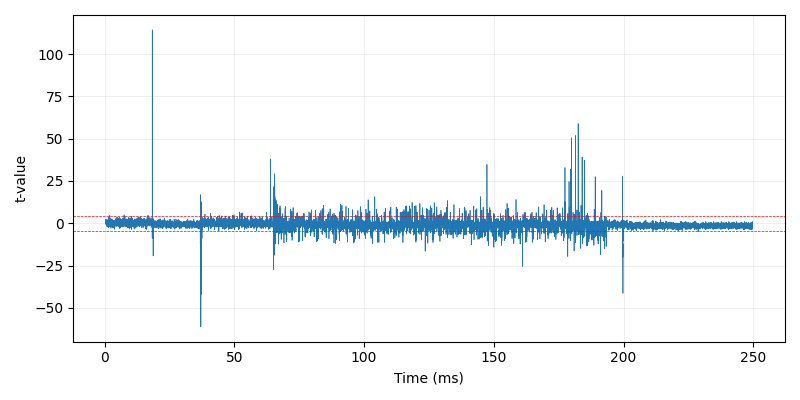

In [17]:
sample_rate = scope.clock.adc_freq / 112 # = scope.clock.adc_rate
time_us = (np.arange(24400) / math.floor(sample_rate)) * 1e3

t_val_ep01 -= 0.5

plt.figure(figsize=(8,4))
plt.plot(time_us[30:16400], t_val_ep01[30:16400], linewidth=0.5)
plt.axhline(y=4.5, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=-4.5, color='r', linestyle='--', linewidth=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('t-value')
plt.grid(True, alpha=0.3, linewidth=0.5)
plt.tight_layout()
plt.savefig("tvla_sign_ep_01.svg", format="svg", bbox_inches='tight')
#plt.ylim(-10, 10)

## TVLA: Scamult 2000x Unprotected

In [24]:
# TVLA
%matplotlib notebook

RESP_LEN=32

scope.adc.samples = 24400
scope.adc.decimate = 85
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

# TVLA config
N=1000
group0 = []
group1 = []
print(f'Measuring {N} measurements each group (g0, g1).')
print(f'g0: fixed scalar, fixed point')
print(f'g1: random scalar, fixed point')
print(f'Protection type: Unprotected')
print(f'-------------------')

start = time.time()

# ===== group0 - fixed scalar, fixed point =====
CMD_TEST = 'k' # scalarmult_unprotected_var_sc_test
DATA_LEN=64

for i in range(N):
    target.flush()
    scope.arm()
    
    scalar = bytearray([ x for x in range(DATA_LEN)]) # fixed scalar
    payload = scalar
    target.simpleserial_write(CMD_TEST,payload)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    if (0 == ed25519_test_scamult_base(scalar, response)):
        group0.append(last_trace)
    else:
        print(i, 'SCAMULT: FAIL')
    if (i % 250 == 0):
        print(f'group0, iteration: {i}')

        
# ===== group1 - random scalar, fixed point =====
CMD_TEST = 'k' # scalarmult_unprotected_var_sc_test
DATA_LEN=64

for i in range(N):
    target.flush()
    scope.arm()
    
    scalar = bytearray(os.urandom(DATA_LEN)) # random scalar
    payload = scalar
    target.simpleserial_write(CMD_TEST,payload)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    
    if (0 == ed25519_test_scamult_base(scalar, response)):
        group1.append(last_trace)
    else:
        print(i, 'SCAMULT: FAIL')
    if (i % 250 == 0):
        print(f'group1, iteration: {i}')

    
end = time.time()
print(f'Measurement finished.')
print(f'Elapsed time of 2*{N} measurements: {end - start}s')
group0_un_scamult = np.array(group0)
print(f'g0 len: {len(group0)}')
group1_un_scamult = np.array(group1)
print(f'g1 len: {len(group1)}')

Measuring 1000 measurements each group (g0, g1).
g0: fixed scalar, fixed point
g1: random scalar, fixed point
Protection type: Unprotected
-------------------
group0, iteration: 0
group0, iteration: 250
group0, iteration: 500
group0, iteration: 750
group1, iteration: 0
group1, iteration: 250
group1, iteration: 500
group1, iteration: 750
Measurement finished.
Elapsed time of 2*1000 measurements: 748.9143350124359s
g0 len: 1000
g1 len: 1000


In [ ]:
np.save('tvla_un_g0_scamult.npy', group0_un_scamult)
np.save('tvla_un_g1_scamult.npy', group1_un_scamult)

In [ ]:
group0_un_scamult = np.load('tvla_un_g0_scamult.npy')
group1_un_scamult = np.load('tvla_un_g1_scamult.npy')

## TVLA: Evaluation Scamult 2000x Unprotected

In [12]:
# g0 g1
t_val_un01 = ttest_ind(group0_un_scamult, group1_un_scamult, axis=0, equal_var=False)[0]

<IPython.core.display.Javascript object>


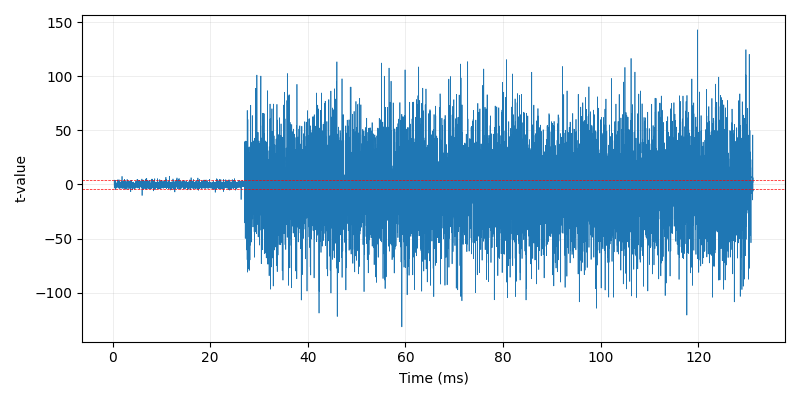

In [23]:
sample_rate = scope.clock.adc_freq / 85 # = scope.clock.adc_rate
time_us = (np.arange(24400) / math.floor(sample_rate)) * 1e3

plt.figure(figsize=(8,4))
plt.plot(time_us[30:11400], t_val_un01[30:11400], linewidth=0.5)
plt.axhline(y=4.5, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=-4.5, color='r', linestyle='--', linewidth=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('t-value')
plt.grid(True, alpha=0.3, linewidth=0.5)
plt.tight_layout()
plt.savefig("tvla_scamult_un_01_second_try1000.svg", format="svg", bbox_inches='tight')
#plt.ylim(-10, 10)


## TVLA: Scamult 2000x Ephemeral

In [15]:
# TVLA
%matplotlib notebook

RESP_LEN=32

scope.adc.samples = 24400
scope.adc.decimate = 85
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

# TVLA config
N=2000
group0 = []
group1 = []
print(f'Measuring {N} measurements each group (g0, g1).')
print(f'g0: fixed scalar, fixed point')
print(f'g1: random scalar, fixed point')
print(f'Protection type: Ephemeral')
print(f'-------------------')

start = time.time()
max_trigger_count = 0

# ===== group0 - fixed scalar, fixed point =====
CMD_TEST = 'l' # scalarmult_ephemeral_var_sc_test
DATA_LEN=64

for i in range(N):
    target.flush()
    scope.arm()
    
    scalar = bytearray([ x for x in range(DATA_LEN)]) # fixed scalar
    payload = scalar
    target.simpleserial_write(CMD_TEST,payload)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    if (0 == ed25519_test_scamult_base(scalar, response)):
        group0.append(last_trace)
    else:
        print(i, 'SCAMULT: FAIL')
    if (i % 250 == 0):
        print(f'group0, iteration: {i}')

        
# ===== group1 - random scalar, fixed point =====
CMD_TEST = 'l' # scalarmult_ephemeral_var_sc_test
DATA_LEN=64

for i in range(N):
    target.flush()
    scope.arm()
    
    scalar = bytearray(os.urandom(DATA_LEN)) # random scalar
    payload = scalar
    target.simpleserial_write(CMD_TEST,payload)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()

    if (0 == ed25519_test_scamult_base(scalar, response)):
        group1.append(last_trace)
    else:
        print(i, 'SCAMULT: FAIL')
    if (i % 250 == 0):
        print(f'group1, iteration: {i}')

    
end = time.time()
print(f'Measurement finished.')
print(f'Elapsed time of 2*{N} measurements: {end - start}s')
group0_ep_scamult = np.array(group0)
print(f'g0 len: {len(group0)}')
group1_ep_scamult = np.array(group1)
print(f'g1 len: {len(group1)}')

Measuring 2000 measurements each group (g0, g1).
g0: fixed scalar, fixed point
g1: random scalar, fixed point
Protection type: Ephemeral
-------------------
group0, iteration: 0
group0, iteration: 250
group0, iteration: 500
group0, iteration: 750
group0, iteration: 1000
group0, iteration: 1250
group0, iteration: 1500
group0, iteration: 1750
group1, iteration: 0
group1, iteration: 250
group1, iteration: 500
group1, iteration: 750
group1, iteration: 1000
group1, iteration: 1250
group1, iteration: 1500
group1, iteration: 1750
Measurement finished.
Elapsed time of 2*2000 measurements: 1404.5720789432526s
g0 len: 2000
g1 len: 2000


In [16]:
np.save('tvla_ep_g0_scamult.npy', group0_ep_scamult)
np.save('tvla_ep_g1_scamult.npy', group1_ep_scamult)

In [17]:
group0_ep_scamult = np.load('tvla_ep_g0_scamult.npy')
group1_ep_scamult = np.load('tvla_ep_g1_scamult.npy')

## TVLA: Evaluation Scamult 2000x Ephemeral

In [18]:
# g0 g1
t_val_ep01 = ttest_ind(group0_ep_scamult, group1_ep_scamult, axis=0, equal_var=False)[0]

<IPython.core.display.Javascript object>


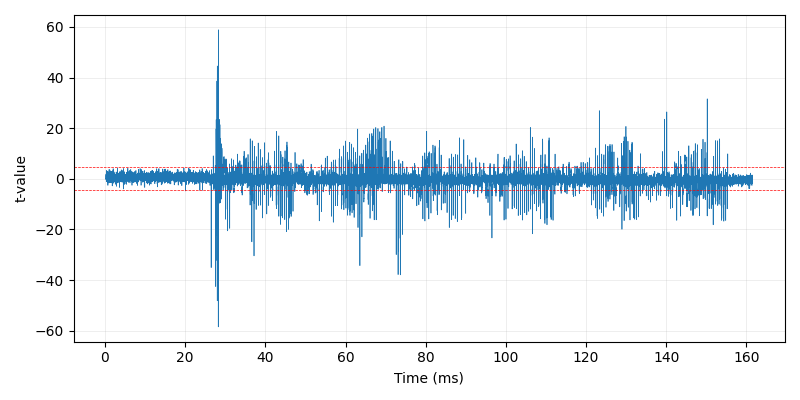

In [45]:
sample_rate = scope.clock.adc_freq / 85 # = scope.clock.adc_rate
time_us = (np.arange(24400) / math.floor(sample_rate)) * 1e3

plt.figure(figsize=(8,4))
plt.plot(time_us[20:14035], t_val_ep01[20:14035], linewidth=0.5)
plt.axhline(y=4.5, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=-4.5, color='r', linestyle='--', linewidth=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('t-value')
plt.grid(True, alpha=0.3, linewidth=0.5)
plt.tight_layout()
plt.savefig("tvla_scamult_ep_01.svg", format="svg", bbox_inches='tight')
#plt.ylim(-10, 10)

# plt.plot(t_val_ep01[:], linewidth=0.5)
# plt.title('Ephemeral scalarmult: fixed vs. random input (1000 traces)')
# plt.axhline(y=4.5, color='r', linestyle='--', linewidth=0.5)
# plt.axhline(y=-4.5, color='r', linestyle='--', linewidth=0.5)
# #plt.ylim(-10, 10)

## TVLA: Scamult 2000x Static

In [46]:
# TVLA
%matplotlib notebook

RESP_LEN=32

scope.adc.samples = 24400
scope.adc.decimate = 85
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

# TVLA config
N=2000
group0 = []
group1 = []
print(f'Measuring {N} measurements each group (g0, g1).')
print(f'g0: fixed scalar, fixed point')
print(f'g1: random scalar, fixed point')
print(f'Protection type: Static')
print(f'-------------------')

start = time.time()
max_trigger_count = 0

# ===== group0 - fixed scalar, fixed point =====
CMD_TEST = 'j' # scalarmult_var_sc_test
DATA_LEN=64

for i in range(N):
    target.flush()
    scope.arm()
    
    scalar = bytearray([ x for x in range(DATA_LEN)]) # fixed scalar
    payload = scalar
    target.simpleserial_write(CMD_TEST,payload)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    if (0 == ed25519_test_scamult_base(scalar, response)):
        group0.append(last_trace)
    else:
        print(i, 'SCAMULT: FAIL')
    if (i % 250 == 0):
        print(f'group0, iteration: {i}')

        
# ===== group1 - random scalar, fixed point =====
CMD_TEST = 'j' # scalarmult_var_sc_test
DATA_LEN=64

for i in range(N):
    target.flush()
    scope.arm()
    
    scalar = bytearray(os.urandom(DATA_LEN)) # random scalar
    payload = scalar
    target.simpleserial_write(CMD_TEST,payload)
    scope.capture()
    response = target.simpleserial_read('r', RESP_LEN)
    
    last_trace = scope.get_last_trace()
    
    if (0 == ed25519_test_scamult_base(scalar, response)):
        group1.append(last_trace)
    else:
        print(i, 'SCAMULT: FAIL')
    if (i % 250 == 0):
        print(f'group1, iteration: {i}')

    
end = time.time()
print(f'Measurement finished.')
print(f'Elapsed time of 2*{N} measurements: {end - start}s')
group0_st_scamult = np.array(group0)
print(f'g0 len: {len(group0)}')
group1_st_scamult = np.array(group1)
print(f'g1 len: {len(group1)}')

Measuring 2000 measurements each group (g0, g1).
g0: fixed scalar, fixed point
g1: random scalar, fixed point
Protection type: Static
-------------------
group0, iteration: 0
group0, iteration: 250
group0, iteration: 500
group0, iteration: 750
group0, iteration: 1000
group0, iteration: 1250
group0, iteration: 1500
group0, iteration: 1750
group1, iteration: 0
group1, iteration: 250
group1, iteration: 500
group1, iteration: 750
group1, iteration: 1000
group1, iteration: 1250
group1, iteration: 1500
group1, iteration: 1750
Measurement finished.
Elapsed time of 2*2000 measurements: 1420.9246697425842s
g0 len: 2000
g1 len: 2000


In [47]:
np.save('tvla_st_g0_scamult.npy', group0_st_scamult)
np.save('tvla_st_g1_scamult.npy', group1_st_scamult)

In [34]:
group0_st_scamult = np.load('tvla_st_g0_scamult.npy')
group1_st_scamult = np.load('tvla_st_g1_scamult.npy')

## TVLA: Evaluation Scamult 1000x Static

In [35]:
# g0 g1
t_val_st01 = ttest_ind(group0_st_scamult, group1_st_scamult, axis=0, equal_var=False)[0]

<IPython.core.display.Javascript object>


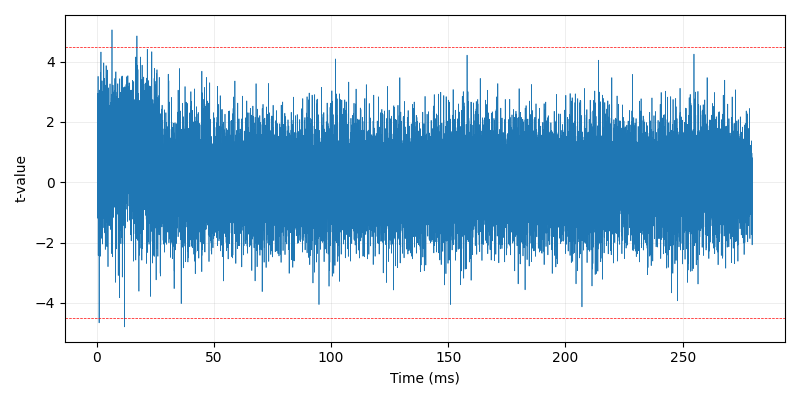

In [37]:
sample_rate = scope.clock.adc_freq / 85 # = scope.clock.adc_rate
time_us = (np.arange(24400) / math.floor(sample_rate)) * 1e3

plt.figure(figsize=(8,4))
plt.plot(time_us[30:24300], t_val_st01[30:24300], linewidth=0.5)
plt.axhline(y=4.5, color='r', linestyle='--', linewidth=0.5)
plt.axhline(y=-4.5, color='r', linestyle='--', linewidth=0.5)
plt.xlabel('Time (ms)')
plt.ylabel('t-value')
plt.grid(True, alpha=0.3, linewidth=0.5)
plt.tight_layout()
plt.savefig("tvla_scamult_st_01.svg", format="svg", bbox_inches='tight')

#plt.ylim(-10, 10)
# plt.figure(figsize=(5, 2))
# plt.plot(time_us[100:], t_val_st01[100:], linewidth=0.5)
# plt.title('Static scalarmult: fixed vs. random input (1000 traces)')
# plt.axhline(y=4.5, color='r', linestyle='--', linewidth=0.5)
# plt.axhline(y=-4.5, color='r', linestyle='--', linewidth=0.5)
# #plt.show()
# #plt.ylim(-10, 10)

## Basic Functionality Test

In [13]:
%matplotlib notebook

scope.adc.samples = 24400
scope.adc.decimate = 60
scope.clock.adc_src = 'clkgen_x1'
scope.gain.db = 30

print(scope.clock)

# a scalarmult_unprotected_test
target.flush()
scope.arm()

CMD_TEST = 'a'
RESP_LEN=16
DATA_LEN=16
msg = bytearray([ x for x in range(DATA_LEN)])

target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)

print("res: {}".format(response))
last_trace = scope.get_last_trace()
print(scope.adc.trig_count)

# b scalarmult_test
target.flush()
scope.arm()

CMD_TEST = 'b'
RESP_LEN=16
DATA_LEN=16
msg = bytearray([ x for x in range(DATA_LEN)])

target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)

print("res: {}".format(response))
last_trace = scope.get_last_trace()
print(scope.adc.trig_count)

# m scalarmult_ephemeral_test
target.flush()
scope.arm()

CMD_TEST = 'm'
RESP_LEN=16
DATA_LEN=16
msg = bytearray([ x for x in range(DATA_LEN)])

target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)

print("res: {}".format(response))
last_trace = scope.get_last_trace()
print(scope.adc.trig_count)

# c ed25519_sign_unprotected_test
target.flush()
scope.arm()

CMD_TEST = 'c'
RESP_LEN=16
DATA_LEN=16
msg = bytearray([ x for x in range(DATA_LEN)])

target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)

print("res: {}".format(response))
last_trace = scope.get_last_trace()
print(scope.adc.trig_count)

# d ed25519_sign_test
target.flush()
scope.arm()

CMD_TEST = 'd'
RESP_LEN=16
DATA_LEN=16
msg = bytearray([ x for x in range(DATA_LEN)])

target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)

print("res: {}".format(response))
last_trace = scope.get_last_trace()
print(scope.adc.trig_count)

# n ed25519_sign_ephemeral_test
target.flush()
scope.arm()

CMD_TEST = 'n'
RESP_LEN=16
DATA_LEN=16
msg = bytearray([ x for x in range(DATA_LEN)])

target.simpleserial_write(CMD_TEST,msg)
scope.capture()
response = target.simpleserial_read('r', RESP_LEN)

print("res: {}".format(response))
last_trace = scope.get_last_trace()
print(scope.adc.trig_count)

adc_src       = clkgen_x1
adc_phase     = 0
adc_freq      = 7384609
adc_rate      = 123076.81666666667
adc_locked    = True
freq_ctr      = 0
freq_ctr_src  = extclk
clkgen_src    = system
extclk_freq   = 10000000
clkgen_mul    = 2
clkgen_div    = 26
clkgen_freq   = 7384615.384615385
clkgen_locked = True

res: bytearray(b'Sanity check : 0')
966249
res: bytearray(b'Sanity check : 0')
2058859
res: bytearray(b'Sanity check : 0')
1195343
res: bytearray(b'Sanity check : 0')
1383895
res: bytearray(b'Sanity check : 0')
2694531
res: bytearray(b'Sanity check : 0')
1829627


## Disconnect from Board

In [33]:
scope.dis()
target.dis()